# DBSCAN
DBSCAN is a popular density-based clustering algorithm that groups data points into clusters based on their density and proximity to each other.
It is particularly useful for discovering clusters of varying densities and shapes in high-dimensional data.\
DBSCAN uses the following parameters:
- eps (epsilon): the maximum distance between two points in a cluster
- minPts: the minimum number of points required to form a dense region

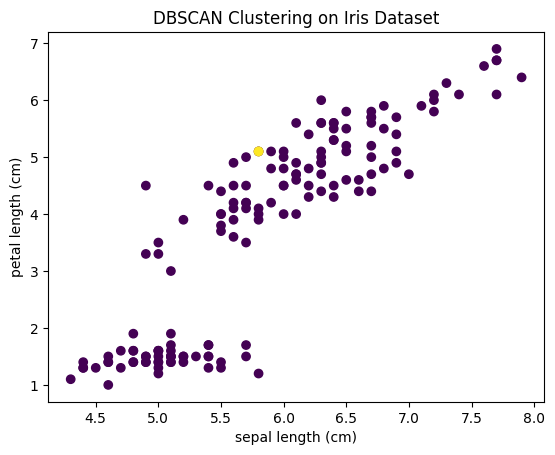

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the DBSCAN object
dbscan = DBSCAN(eps=0.1, min_samples=2)

# Fit the model
dbscan.fit(X_scaled)

# Plot the data points with color-coded clusters
plt.scatter(X[:, 0], X[:, 2], c=dbscan.labels_)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title("DBSCAN Clustering on Iris Dataset")
plt.show()

---
# DBSCAN vs OPTICS Clustering:
`DBSCAN` and `OPTICS` are both density-based clustering algorithms that group together data points that are close to each other in the feature space. However, there are some differences between the two algorithms in terms of performance and scalability:
>> **`DBSCAN:`**
> - Estimates the density by counting the number of points in a fixed-radius neighborhood or Eps and deems that two points are connected only if they lie within each other's neighborhood.
> - Uses two parameters such as Eps and MinPts. Eps denotes the Eps-neighborhood of a point and MinPts denotes the minimum number of points required to form a dense region.
> - Can find arbitrary shaped clusters using MinPts parameters.
> - The order of the point in the database is insensitive.
> - Handles noise and outliers.
> - Cannot perform well with large differences in densities.
> - Requires less memory than OPTICS.

> > **`OPTICS:`**
> - Works like an extension of DBSCAN but does not assign cluster memberships but stores the order in which points are processed.
> - Generates an enhanced order of the data collection structure.
> - Can extract clusters of varying densities and shapes.
> - Does not require to set the number of clusters in advance, instead, it extracts the clustering structure of the data and produces the reachability plot. This allows the user to have more flexibility in selecting the number of clusters.
> - Requires more memory than DBSCAN as it maintains a priority queue (Min Heap) to determine the next data point which is closest to the point currently being processed in terms of Reachability Distance.
> - Requires more computational power because the nearest neighbor queries are more complicated than radius queries in DBSCAN.
> - In summary, DBSCAN is a good choice for datasets with arbitrary shaped clusters and handles noise and outliers well. On the other hand, OPTICS is more flexible in selecting the number of clusters and can extract clusters of varying densities and shapes. However, it requires more memory and computational power than DBSCAN. 

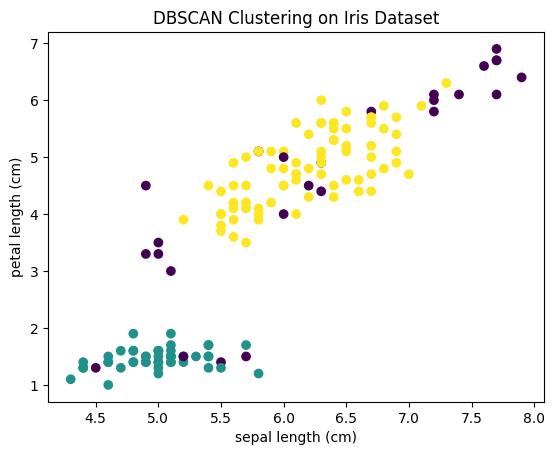

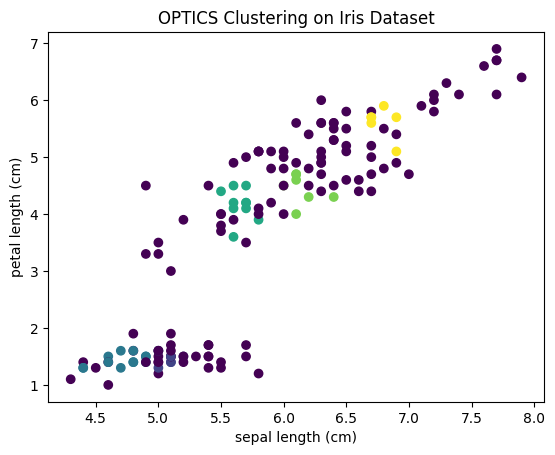

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
X = iris.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create the DBSCAN object
dbscan = DBSCAN(eps=0.6, min_samples=5)

# Create the OPTICS object
optics = OPTICS(min_samples=5, xi=0.05)

# Fit the models
dbscan.fit(X_scaled)
optics.fit(X_scaled)

# Plot the data points with color-coded clusters for DBSCAN
plt.scatter(X[:, 0], X[:, 2], c=dbscan.labels_)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title("DBSCAN Clustering on Iris Dataset")
plt.show()

# Plot the data points with color-coded clusters for OPTICS
plt.scatter(X[:, 0], X[:, 2], c=optics.labels_)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title("OPTICS Clustering on Iris Dataset")
plt.show()

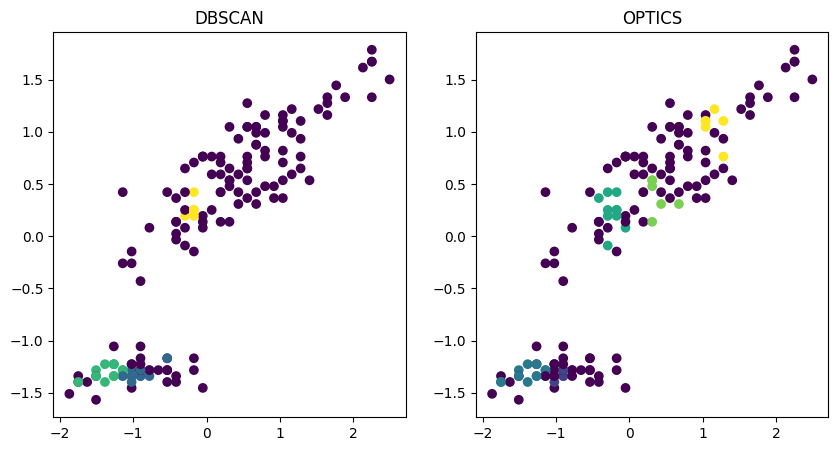

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN, OPTICS
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
df = sns.load_dataset('iris')

# Selecting features to perform clustering
# Here, we'll use all four features
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

# Normalize the features
X = StandardScaler().fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Apply OPTICS
optics = OPTICS(min_samples=5)
optics_labels = optics.fit_predict(X)

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# DBSCAN plot
# For visualization purpose, let's use first two features (sepal_length and sepal_width)
ax[0].scatter(X[:, 0], X[:, 2], c=dbscan_labels, cmap='viridis')
ax[0].set_title('DBSCAN')

# OPTICS plot
# For visualization purpose, let's use first two features (sepal_length and sepal_width)
ax[1].scatter(X[:, 0], X[:, 2], c=optics_labels, cmap='viridis')
ax[1].set_title('OPTICS')

plt.show()

## **Hyperparameters for DBSCAN**
A `k-distance plot`, also known as a k-distance graph, is a useful tool for determining the appropriate epsilon value when using the DBSCAN algorithm. The idea behind a k-distance plot is to plot the distance to the kth nearest neighbor for each point, sort the distances, and then look for the "elbow" or `"knee"` in the plot. The value of epsilon can be chosen as the y-coordinate of this `"elbow"` point.

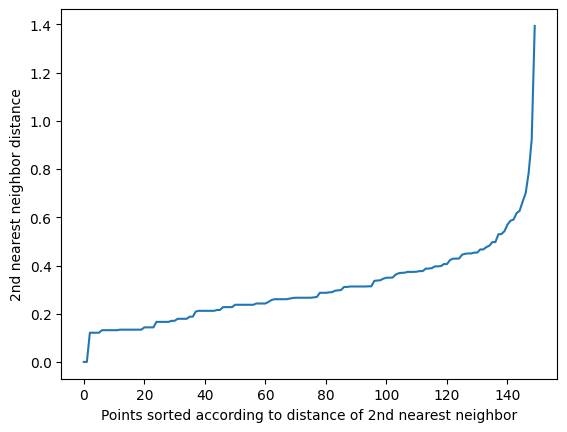

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the 'iris' dataset
df = sns.load_dataset('iris')

# Normalize the features
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
features = StandardScaler().fit_transform(features)

# Find the nearest neighbors
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(features)
distances, indices = nbrs.kneighbors(features)

# Sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Plot the k-distance plot
plt.plot(distances)
plt.xlabel('Points sorted according to distance of 2nd nearest neighbor')
plt.ylabel('2nd nearest neighbor distance')
plt.show()

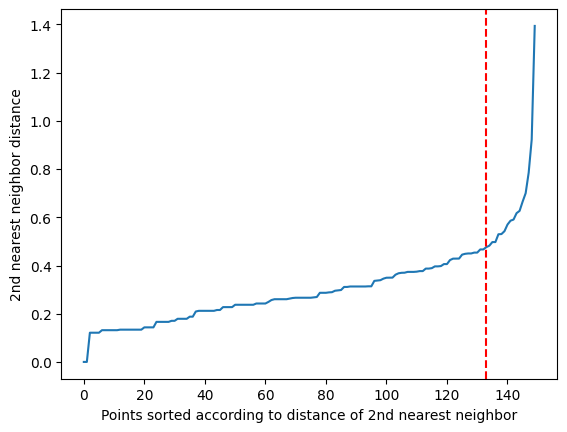

Suggested value of eps: 0.4760712736677158


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from kneed import KneeLocator

# Load the 'iris' dataset
df = sns.load_dataset('iris')

# Normalize the features
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
features = StandardScaler().fit_transform(features)

# Find the nearest neighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(features)
distances, indices = nbrs.kneighbors(features)

# Sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Identify the "elbow" in the k-distance plot
kneedle = KneeLocator(range(1,len(distances)+1), distances, S=1.0, curve='convex', direction='increasing')
elbow_index = kneedle.elbow

# Plot the k-distance plot
plt.plot(distances)
plt.xlabel('Points sorted according to distance of 2nd nearest neighbor')
plt.ylabel('2nd nearest neighbor distance')

# Add a vertical line at the "elbow" point
plt.axvline(x=elbow_index, color='r', linestyle='--')

plt.show()

# Print the value of 'eps'
print('Suggested value of eps:', distances[elbow_index])

## **How to find the best num of MinPts**

In [8]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

# Load the 'iris' dataset
df = sns.load_dataset('iris')

# Normalize the features
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
features = StandardScaler().fit_transform(features)

# Use the previously calculated 'eps' (from the k-distance plot)
eps = 0.5  # Replace with your calculated value

# Define the range for 'minPts'
minPts_range = range(2, 11)

# Initialize the variables to store the best 'minPts' and the corresponding silhouette score
best_minPts = -1
best_silhouette = -float('inf')

# Grid search over the 'minPts' range
for minPts in minPts_range:
    dbscan = DBSCAN(eps=eps, min_samples=minPts)
    labels = dbscan.fit_predict(features)
    
    # Ignore execution if no clusters were found
    if len(np.unique(labels)) < 2 or (labels == -1).all():
        continue

    silhouette = silhouette_score(features, labels)
    print(f'minPts: {minPts}, silhouette score: {silhouette}')

    if silhouette > best_silhouette:
        best_silhouette = silhouette
        best_minPts = minPts

print(f'Best minPts: {best_minPts}, silhouette score: {best_silhouette}')

minPts: 2, silhouette score: 0.1150059338947623
minPts: 3, silhouette score: 0.15971036873870176
minPts: 4, silhouette score: 0.36457435678297534
minPts: 5, silhouette score: 0.3565164814270073
minPts: 6, silhouette score: 0.1958665929942779
minPts: 7, silhouette score: 0.1391483140504277
minPts: 8, silhouette score: 0.18821743063720223
minPts: 9, silhouette score: 0.06932089894577982
minPts: 10, silhouette score: 0.009426257445526207
Best minPts: 4, silhouette score: 0.36457435678297534
